In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[25]:


from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# In[26]:


ydf = pd.read_excel('../data/PCA_RESULT.xlsx')


# In[27]:


ydf

,df_PC1,df_PC2,df_PC3,df_PC4,infra,human_PC1,human_PC2,anim_PC1,anim_PC2,anim_PC3,anim_PC4,infra.1,df_avg_PC1,df_avg_PC2,infra.2,avg_human_PC1,avg_human_PC2,avg_anim_PC1,avg_anim_PC2,infra.3
0,-3.657291,1.068483,0.899101,-0.721043,82,-3.195634,-1.253945,-0.988250,-1.853128,-0.543204,0.101766,82,-3.084844,-1.827489,82,-3.088988,-0.919333,-0.609507,-0.757719,82
1,-1.809122,-1.664866,1.347274,0.226070,52,-1.662495,0.215808,-1.580173,1.030533,-1.356675,-0.797009,52,-1.513684,1.199472,52,-1.387396,-0.452411,-0.952789,2.642373,52
2,1.811663,-0.048784,-1.282027,-0.137331,24,1.689212,0.479953,0.601247,0.376393,1.206849,-0.170506,24,1.326311,0.949003,24,1.699790,0.116274,-0.431504,-0.281748,24
3,-5.441931,0.646651,-0.035307,-0.076125,49,-4.950329,0.218342,-1.541030,-1.794551,0.075582,-0.081419,49,-5.146401,-0.379719,49,-4.755683,0.359857,-1.904505,-0.683728,49
4,-2.974846,-3.532851,-1.554479,0.456142,30,-2.601262,0.721542,-2.995354,2.079428,1.543947,1.165377,30,-4.528597,3.415673,30,-3.114664,3.168928,-3.878933,0.164950,30
5,1.109629,0.060324,-0.857969,0.257820,35,0.957733,0.276897,0.582075,0.243110,0.752264,0.078446,35,0.892075,0.079370,35,0.772056,0.724156,0.525105,-0.379780,35
6,-0.894870,1.294254,-0.910219,-0.171206,28,-0.884747,0.341223,0.549800,-1.233603,0.822988,-0.486491,28,-0.646551,-1.161722,28,-0.746047,-0.198179,0.212668,-1.364242,28
7,3.977287,0.820925,-0.089330,0.211220,16,3.587531,0.395330,1.899175,0.196260,-0.113638,0.019267,16,4.116471,-0.482851,16,3.370154,0.337648,2.496230,-0.500001,16
8,-3.559107,1.112463,1.713195,0.903396,43,-3.303284,0.272319,-0.596219,-1.666845,-1.846494,0.435740,43,-3.016272,-0.440986,43,-2.920161,-0.587501,-0.870740,0.214743,43
9,1.381645,0.502739,0.309338,0.100647,25,1.339320,0.259837,0.593386,-0.245783,-0.388397,0.111912,25,1.678379,-0.230408,25,1.469609,-0.524429,0.796602,-0.118857,25


In [3]:
# In[29]:


lNames=['df_PC1','df_PC2', 'df_PC3','df_PC4', 'infra']
aNames=['df_avg_PC1','df_avg_PC2', 'infra.2'  ]
l_df = pd.DataFrame(ydf, columns=lNames)
a_df = pd.DataFrame(ydf, columns = aNames)


In [4]:

# In[30]:


#스케일링

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(l_df)
sl_df = scaler.fit_transform(l_df)

scaler.fit_transform(a_df)
sa_df = scaler.fit_transform(a_df)



In [89]:
# In[31]:


# GMM 
from sklearn.mixture import GaussianMixture


# In[32]:


# n_components로 군집 개수 설정

n=4
GMM = GaussianMixture(n_components=n, random_state=0, )#covariance_type = 'full')


In [90]:
sl_labels = GMM.fit_predict(sl_df)
sa_labels = GMM.fit_predict(sa_df)

GMM_l_CL = pd.DataFrame(sl_labels)
GMM_a_CL = pd.DataFrame(sa_labels)

In [91]:
gm_sl_df = pd.DataFrame(sl_df)
gm_sl_df['sl_labels'] = sl_labels
gm_sl_df.columns = ["ftr1", 'ftr2', 'ftr3', 'ftr4', 'ftr5', 'sl_labels']
gm_sl_df

,ftr1,ftr2,ftr3,ftr4,ftr5,sl_labels
0,-1.109032,0.805737,0.888977,-1.350031,2.932209,2
1,-0.548596,-1.255467,1.332103,0.423277,1.014897,2
2,0.549366,-0.036788,-1.267591,-0.257130,-0.774594,3
3,-1.650204,0.487636,-0.034909,-0.142531,0.823166,2
4,-0.902088,-2.664103,-1.536975,0.854048,-0.391132,3
5,0.336482,0.045490,-0.848308,0.482725,-0.071580,3
6,-0.271359,0.975990,-0.899970,-0.320554,-0.518953,3
7,1.206067,0.619055,-0.088324,0.395473,-1.285877,1
8,-1.079259,0.838902,1.693904,1.691457,0.439704,2
9,0.418968,0.379113,0.305854,0.188445,-0.710684,1


In [105]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
       
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
   
    plt.legend(loc=legend_loc)
    # plt.savefig('../graph/CL_gmm.png')
    plt.show()
    
    

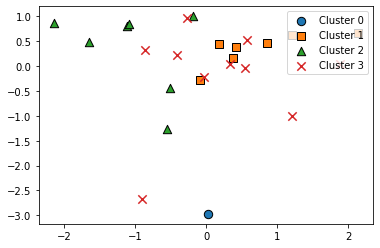

In [106]:
visualize_cluster_plot(GMM,gm_sl_df, 'sl_labels', iscenter = False )

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram

# In[17]:


hier_l_CL = linkage(sl_df,method='complete')
hier_a_CL = linkage(sa_df,method='complete')

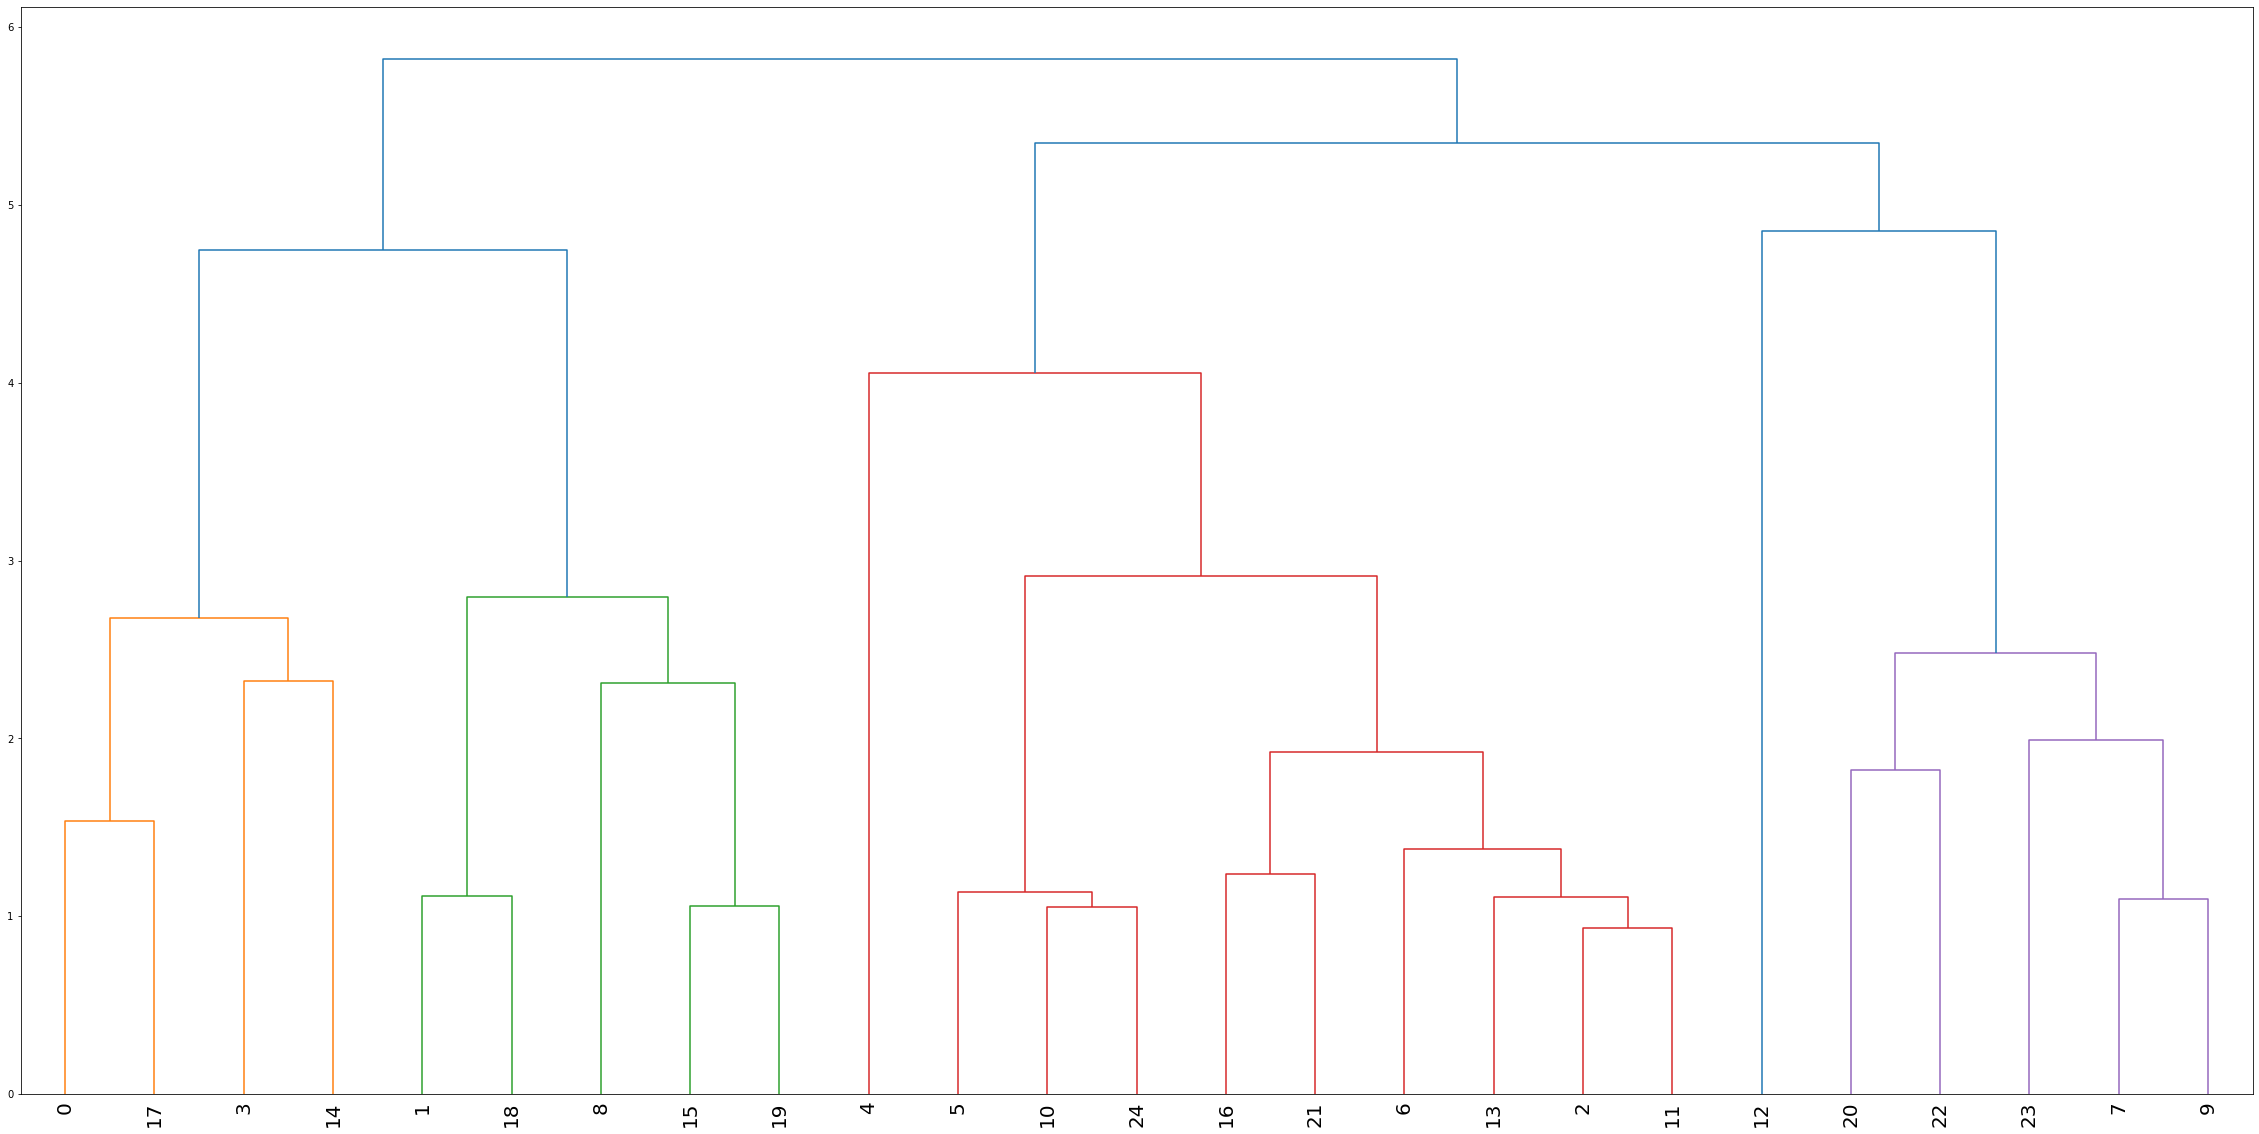

In [22]:
plt.figure(figsize=(40,20))
dendrogram(hier_l_CL,
          
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()
# plt.savefig('hira_fa_a.png',dpi=80)

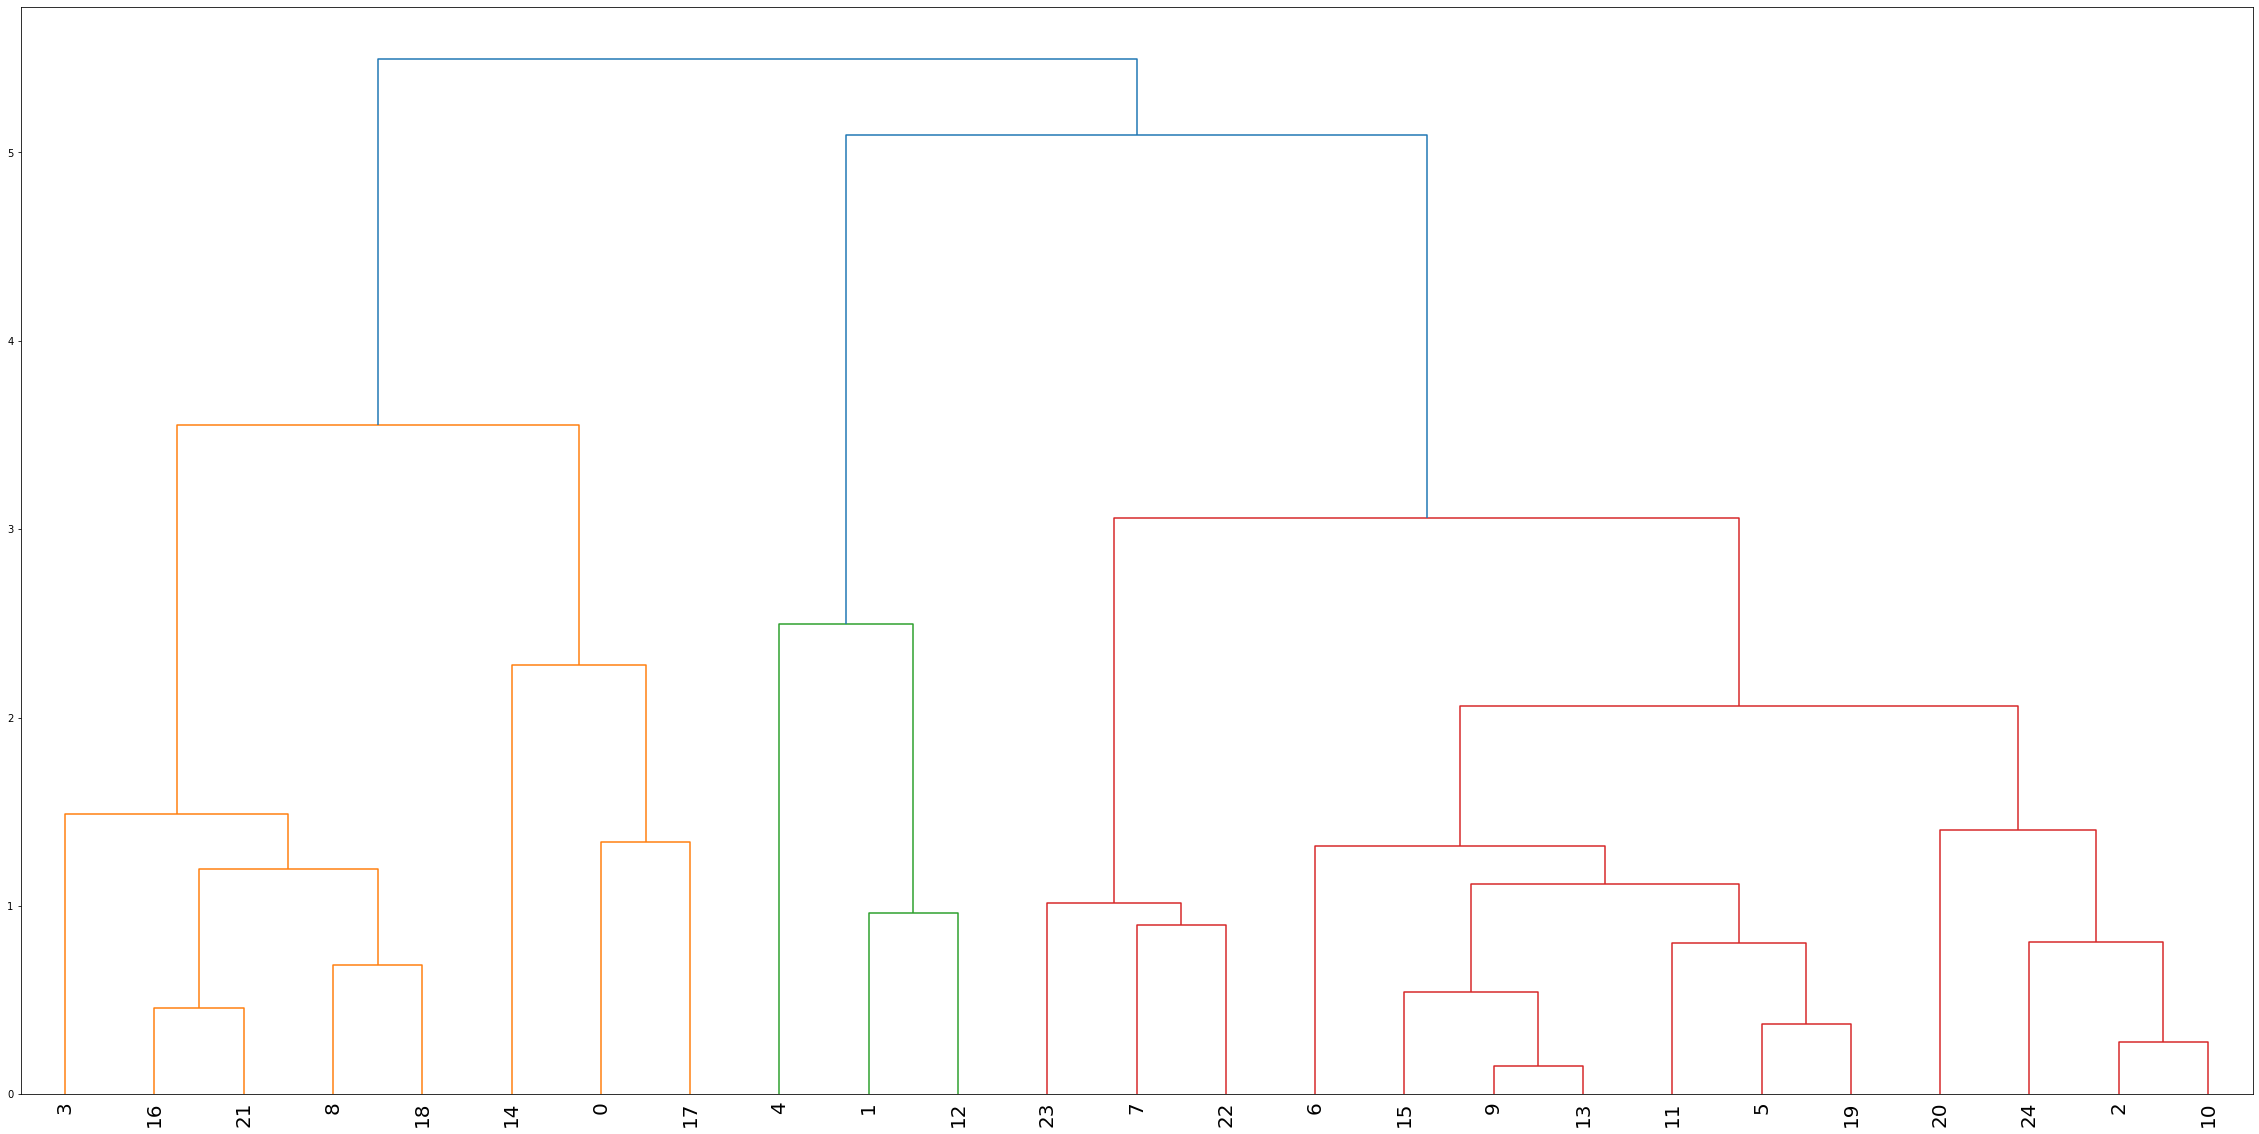

In [34]:
plt.figure(figsize=(40,20))
dendrogram(hier_a_CL,
          
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()
# plt.savefig('hira_fa_a.png',dpi=80)

In [27]:
from sklearn.cluster import MeanShift, estimate_bandwidth
gu={'gu':['강남구','강동구','강북구','강서구','관악구',
'광진구','구로구','금천구','노원구','도봉구',
'동대문구','동작구','마포구','서대문구','서초구',
'성동구','성북구','송파구','양천구','영등포구',
'용산구','은평구','종로구','중구','중랑구'
]}
clust_gu = pd.DataFrame(gu)
ms_l_CL = sl_df
ms_a_CL = sa_df

names = ['ms_l_CL','ms_a_CL']
for i in names:
    bandwidth=estimate_bandwidth(eval(i))
    meanshift=MeanShift(bandwidth=bandwidth)
    labels=meanshift.fit_predict(eval(i))
    clust_gu[i]=labels

In [28]:
clust_gu

,gu,ms_l_CL,ms_a_CL
0,강남구,1,1
1,강동구,1,0
2,강북구,0,0
3,강서구,1,1
4,관악구,3,2
5,광진구,0,0
6,구로구,0,0
7,금천구,0,0
8,노원구,1,0
9,도봉구,0,0


In [32]:
# In[33]:
columnNames=['gu','MS_I_CL','MS_a_CL', 'GMM_l_CL', 'GMM_a_CL']
final = pd.DataFrame(np.hstack((clust_gu, GMM_l_CL,GMM_a_CL )), columns=columnNames)


final.to_csv('PCA_AC_CL.csv', sep=',', na_rep='NaN', encoding = 'cp949')

In [33]:
final

,gu,MS_I_CL,MS_a_CL,GMM_l_CL,GMM_a_CL
0,강남구,1,1,3,3
1,강동구,1,0,0,0
2,강북구,0,0,2,1
3,강서구,1,1,3,2
4,관악구,3,2,2,0
5,광진구,0,0,2,1
6,구로구,0,0,2,1
7,금천구,0,0,1,1
8,노원구,1,0,1,2
9,도봉구,0,0,1,1


In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [40]:
t_df = pd.read_csv('./PCA_AC_CL.csv', encoding='cp949')

In [42]:
t_df.head() # 12~17, 18~20

,Unnamed: 0,gu,MS_I_CL,MS_a_CL,GMM_l_CL,GMM_a_CL,HIER_l_CL,HIER_a_CL,km_l_CL,km_a_CL,db_l_CL,db_a_CL,df_PC1,df_PC2,df_PC3,df_PC4,infra,df_avg_PC1,df_avg_PC2,infra.2
0,0,강남구,1,1,3,3,0,1,2,4,1,0,-3.657291,1.068483,0.899101,-0.721043,82,-3.084844,-1.827489,82
1,1,강동구,1,0,0,0,1,2,4,3,2,1,-1.809122,-1.664866,1.347274,0.226070,52,-1.513684,1.199472,52
2,2,강북구,0,0,2,1,2,3,1,3,3,1,1.811663,-0.048784,-1.282027,-0.137331,24,1.326311,0.949003,24
3,3,강서구,1,1,3,2,0,0,2,2,1,0,-5.441931,0.646651,-0.035307,-0.076125,49,-5.146401,-0.379719,49
4,4,관악구,3,2,2,0,2,2,4,3,0,0,-2.974846,-3.532851,-1.554479,0.456142,30,-4.528597,3.415673,30


In [45]:
FA_A = t_df.iloc[:,12:17]
FA_C = t_df.iloc[:,18:20]

In [60]:
for i in range(2,12,2):
    print(silhouette_score(FA_A,t_df.iloc[:,i].values)) 
 # meanshift, GMM, HIER, kmeans, dbscan

-0.11659831691545693
-0.061568221478764375
0.07398285235737437
-0.05006788094710282
0.12220483875541945


In [59]:
for i in range(3,12,2):
    print(silhouette_score(FA_C,t_df.iloc[:,i].values))
# meanshift, GMM, HIER, kmeans, dbscan

0.0548413159065234
0.3495064477007324
0.24803891349947282
0.060473794440140526
-0.20473645146903308
